# Atividade 1

### Disciplina: Matemática Computacional
### Aluna: Sara Matos



Vamos começar importando as bibliotecas necessárias. O NumPy é essencial para operações matriciais e o Matplotlib para visualizações gráficas.

In [1]:
import numpy as np  # Biblioteca para operações matemáticas e matriciais
import matplotlib.pyplot as plt  # Biblioteca para criar gráficos e visualizações

# Configuração do estilo dos gráficos para melhor visualização
plt.style.use('default')  # Usa o estilo padrão do Matplotlib
plt.rcParams['figure.figsize'] = [10, 6]  # Define o tamanho padrão das figuras: 10 polegadas de largura, 6 de altura
plt.rcParams['font.size'] = 12  # Define o tamanho da fonte como 12 pontos

print("Bibliotecas importadas com sucesso!")
print("NumPy versão:", np.__version__)

Bibliotecas importadas com sucesso!
NumPy versão: 2.0.2


#Rotação de 90° + Cisalhamento em X

Optou-se em criar duas transformações lineares e aplicá-las sequencialmente a um vetor.

ITEM 1: Rotação horária de 90° + Shear em x
Referência: Slides 60-68 - Matrix multiplication as composition

1.1 Definindo a Matriz de Rotação R (90° horário):

Ângulo: -1.5708 radianos (-90°)

Matriz de Rotação R =
[[cosθ, -sinθ],
 [sinθ,  cosθ]] =
[[ 6.123234e-17  1.000000e+00]
 [-1.000000e+00  6.123234e-17]]

Verificando na base canônica:
e₁ = [1, 0] → R·e₁ = [ 6.123234e-17 -1.000000e+00]
e₂ = [0, 1] → R·e₂ = [1.000000e+00 6.123234e-17]

Interpretação:
• e₁ [1,0] vira [0,-1] (aponta para baixo)
• e₂ [0,1] vira [1,0] (aponta para direita)
✓ Confirmado: rotação de 90° horário!


1.2 Definindo a Matriz de Cisalhamento S (shear em x):

Fator de cisalhamento k = 2.0

Matriz de Cisalhamento S =
[[1, k],
 [0, 1]] =
[[1. 2.]
 [0. 1.]]

Verificando na base canônica:
e₁ = [1, 0] → S·e₁ = [1. 0.]
e₂ = [0, 1] → S·e₂ = [2. 1.]

Interpretação:
• e₁ [1,0] permanece [1,0] (não é afetado pelo shear em x)
• e₂ [0,1] vira [2.0,1] (é deslocado 2.0 unidades em x)
✓ Confirmado: cisalhamento horizontal!



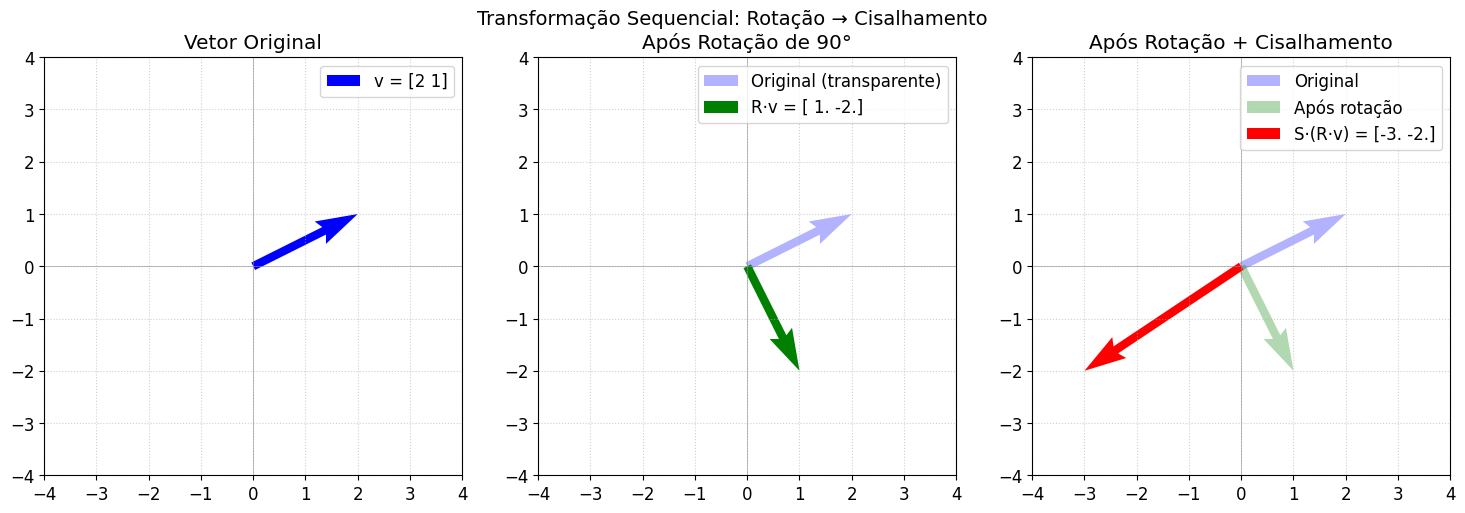

Visualização criada!

Interpretação visual:
• Azul: vetor original [2, 1]
• Verde: após rotação [1, -2] (girou 90° horário)
• Vermelho: final [-3, -2] (sofreu cisalhamento)


In [9]:
print("ITEM 1: Rotação horária de 90° + Shear em x")
print("Referência: Slides 60-68 - Matrix multiplication as composition")

# PASSO 1: Definir a matriz de rotação de 90° no sentido horário
print("\n1.1 Definindo a Matriz de Rotação R (90° horário):")

# Explicação: Para criar uma rotação, usamos funções trigonométricas
# A matriz geral de rotação é: [[cosθ, -sinθ], [sinθ, cosθ]]
# Para θ = -90° (negativo porque é horário)

theta = np.radians(-90)  # Converte -90 graus para radianos
# radianos são a unidade natural para funções trigonométricas no Python

matriz_rotacao = np.array([
    [np.cos(theta), -np.sin(theta)],  # Primeira linha da matriz
    [np.sin(theta),  np.cos(theta)]   # Segunda linha da matriz
])

print(f"\nÂngulo: {theta:.4f} radianos (-90°)")
print("\nMatriz de Rotação R =")
print("[[cosθ, -sinθ],")
print(" [sinθ,  cosθ]] =")
print(matriz_rotacao)

# Vamos verificar o que acontece com os vetores base
print("\nVerificando na base canônica:")
print("e₁ = [1, 0] → R·e₁ =", matriz_rotacao @ np.array([1, 0]))
print("e₂ = [0, 1] → R·e₂ =", matriz_rotacao @ np.array([0, 1]))
print("\nInterpretação:")
print("• e₁ [1,0] vira [0,-1] (aponta para baixo)")
print("• e₂ [0,1] vira [1,0] (aponta para direita)")
print("✓ Confirmado: rotação de 90° horário!")

# PASSO 2: Definir a matriz de cisalhamento horizontal (shear em x)
print("\n\n1.2 Definindo a Matriz de Cisalhamento S (shear em x):")

# Explicação: Cisalhamento desloca pontos horizontalmente proporcional à coordenada y
# A matriz geral é: [[1, k], [0, 1]], onde k é o fator de cisalhamento

k = 2.0  # Fator de cisalhamento: para cada unidade em y, desloca 2 unidades em x
matriz_cisalhamento = np.array([
    [1, k],  # Primeira linha: mantém x, adiciona k*y a x
    [0, 1]   # Segunda linha: mantém y inalterado
])

print(f"\nFator de cisalhamento k = {k}")
print("\nMatriz de Cisalhamento S =")
print("[[1, k],")
print(" [0, 1]] =")
print(matriz_cisalhamento)

print("\nVerificando na base canônica:")
print("e₁ = [1, 0] → S·e₁ =", matriz_cisalhamento @ np.array([1, 0]))
print("e₂ = [0, 1] → S·e₂ =", matriz_cisalhamento @ np.array([0, 1]))
print("\nInterpretação:")
print("• e₁ [1,0] permanece [1,0] (não é afetado pelo shear em x)")
print(f"• e₂ [0,1] vira [{k},1] (é deslocado {k} unidades em x)")
print("✓ Confirmado: cisalhamento horizontal!")

# PASSO 3: Escolher um vetor para transformar
print("\n\n1.3 Escolhendo um vetor de teste:")

v_original = np.array([2, 1])  # Vetor no primeiro quadrante
print(f"Vetor escolhido: v = {v_original}")
print("Este vetor está no primeiro quadrante (x positivo, y positivo)")

# PASSO 4: Aplicar as transformações sequencialmente
print("\n\n1.4 Aplicando as transformações sequencialmente:")

print("\nPASSO 1: Aplicar rotação de 90° horário")
print(f"v_original = {v_original}")
print("Realizando: v_rotacionado = R · v")

v_rotacionado = matriz_rotacao @ v_original  # Multiplicação matriz-vetor
print(f"v_rotacionado = \n{matriz_rotacao} @ {v_original} = {v_rotacionado}")

print("\nCálculo passo a passo:")
print(f"x' = cos(-90°)*2 + (-sin(-90°))*1 = 0*2 + 1*1 = {0*2 + 1*1}")
print(f"y' = sin(-90°)*2 + cos(-90°)*1 = (-1)*2 + 0*1 = {(-1)*2 + 0*1}")

print("\nPASSO 2: Aplicar cisalhamento horizontal")
print(f"v_rotacionado = {v_rotacionado}")
print("Realizando: v_final = S · v_rotacionado")

v_final = matriz_cisalhamento @ v_rotacionado
print(f"v_final = \n{matriz_cisalhamento} @ {v_rotacionado} = {v_final}")

print("\nCálculo passo a passo:")
print(f"x'' = 1*1 + 2*(-2) = {1*1 + 2*(-2)}")
print(f"y'' = 0*1 + 1*(-2) = {0*1 + 1*(-2)}")

print(f"\nRESUMO DA TRANSFORMAÇÃO:")
print(f"v = {v_original} → R·v = {v_rotacionado} → S·(R·v) = {v_final}")

# PASSO 5: Visualizar o processo
print("\n\n1.5 Visualizando a transformação passo a passo:")
print("-" * 50)

def plotar_transformacao_sequencial(v, v_rot, v_final):
    """
    Função para visualizar as transformações sequenciais
    """
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    # Configurações comuns
    for ax in (ax1, ax2, ax3):
        ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.5, alpha=0.7)
        ax.axvline(x=0, color='gray', linestyle='-', linewidth=0.5, alpha=0.7)
        ax.grid(True, linestyle=':', alpha=0.6)
        ax.set_aspect('equal')
        ax.set_xlim(-4, 4)
        ax.set_ylim(-4, 4)

    # Gráfico 1: Vetor original
    ax1.quiver(0, 0, v[0], v[1],
               angles='xy', scale_units='xy', scale=1,
               color='blue', width=0.02, label=f'v = {v}')
    ax1.set_title('Vetor Original')
    ax1.legend()

    # Gráfico 2: Após rotação
    ax2.quiver(0, 0, v[0], v[1],
               angles='xy', scale_units='xy', scale=1,
               color='blue', width=0.02, alpha=0.3, label='Original (transparente)')
    ax2.quiver(0, 0, v_rot[0], v_rot[1],
               angles='xy', scale_units='xy', scale=1,
               color='green', width=0.02, label=f'R·v = {v_rot}')
    ax2.set_title('Após Rotação de 90°')
    ax2.legend()

    # Gráfico 3: Após cisalhamento
    ax3.quiver(0, 0, v[0], v[1],
               angles='xy', scale_units='xy', scale=1,
               color='blue', width=0.02, alpha=0.3, label='Original')
    ax3.quiver(0, 0, v_rot[0], v_rot[1],
               angles='xy', scale_units='xy', scale=1,
               color='green', width=0.02, alpha=0.3, label='Após rotação')
    ax3.quiver(0, 0, v_final[0], v_final[1],
               angles='xy', scale_units='xy', scale=1,
               color='red', width=0.02, label=f'S·(R·v) = {v_final}')
    ax3.set_title('Após Rotação + Cisalhamento')
    ax3.legend()

    plt.suptitle('Transformação Sequencial: Rotação → Cisalhamento', fontsize=14)
    plt.tight_layout()
    plt.show()

# Chamar a função de visualização
plotar_transformacao_sequencial(v_original, v_rotacionado, v_final)

print("Visualização criada!")
print("\nInterpretação visual:")
print("• Azul: vetor original [2, 1]")
print("• Verde: após rotação [1, -2] (girou 90° horário)")
print("• Vermelho: final [-3, -2] (sofreu cisalhamento)")

# Análise do Determinante
O determinante tem um significado geométrico importante: mede como a transformação altera áreas.

ITEM 2: Análise do Determinante

2.1 Calculando determinantes das matrizes individuais:
--------------------------------------------------

Para a matriz de rotação R:
R = [[ 6.123234e-17  1.000000e+00]
 [-1.000000e+00  6.123234e-17]]
det(R) = 1.0000

Para a matriz de cisalhamento S:
S = [[1. 2.]
 [0. 1.]]
det(S) = 1.0000


2.2 Interpretação geométrica dos determinantes:
--------------------------------------------------

Para a ROTAÇÃO (matriz R):
• |det(R)| = 1.00 → A rotação PRESERVA ÁREA
  (Figuras não expandem nem contraem, apenas giram)
• det(R) = 1.00 > 0 → A rotação MANTÉM ORIENTAÇÃO

Para o CISALHAMENTO (matriz S):
• det(S) = 1.00 → O cisalhamento PRESERVA ÁREA
  (Distorce a forma mas mantém a área total)
• det(S) = 1.00 > 0 → MANTÉM ORIENTAÇÃO
  (Não vira figuras de dentro para fora)


2.3 Visualizando o efeito nas áreas:
--------------------------------------------------

Visualizando efeito da ROTAÇÃO na área:


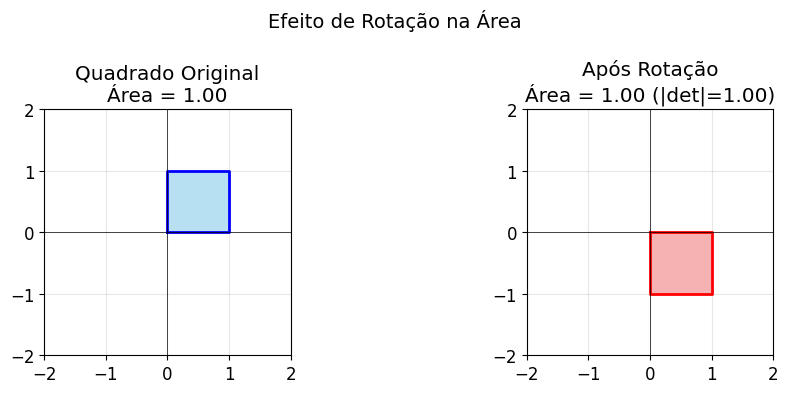


Visualizando efeito do CISALHAMENTO na área:


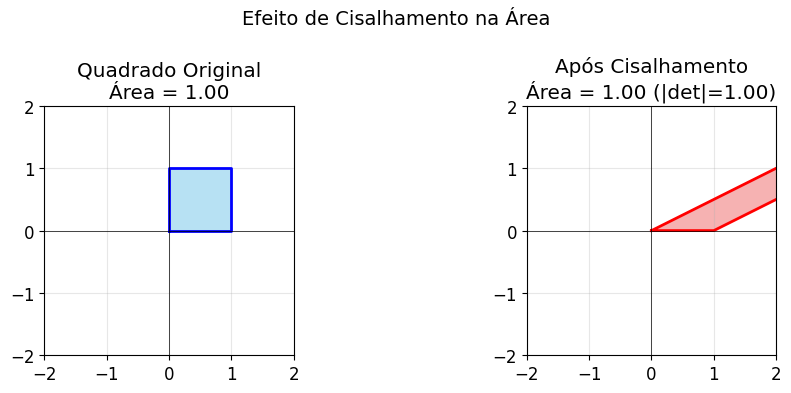


Observações importantes:
1. ROTAÇÃO: O quadrado gira mas mantém EXATAMENTE a mesma área
2. CISALHAMENTO: O quadrado vira paralelogramo mas área permanece igual
3. Ambos têm |det| = 1 → são transformações que PRESERVAM ÁREA


In [14]:
print("ITEM 2: Análise do Determinante")

# PASSO 1: Calcular determinantes individuais
print("\n2.1 Calculando determinantes das matrizes individuais:")
print("-" * 50)

# Calcular determinante da matriz de rotação
det_R = np.linalg.det(matriz_rotacao)
print(f"\nPara a matriz de rotação R:")
print(f"R = {matriz_rotacao}")
print(f"det(R) = {det_R:.4f}")

# Calcular determinante da matriz de cisalhamento
det_S = np.linalg.det(matriz_cisalhamento)
print(f"\nPara a matriz de cisalhamento S:")
print(f"S = {matriz_cisalhamento}")
print(f"det(S) = {det_S:.4f}")

# PASSO 2: Interpretar geometricamente os determinantes
print("\n\n2.2 Interpretação geométrica dos determinantes:")
print("-" * 50)

print("\nPara a ROTAÇÃO (matriz R):")
if np.isclose(abs(det_R), 1.0):
    print(f"• |det(R)| = {abs(det_R):.2f} → A rotação PRESERVA ÁREA")
    print("  (Figuras não expandem nem contraem, apenas giram)")

if det_R < 0:
    print(f"• det(R) = {det_R:.2f} < 0 → A rotação INVERTE ORIENTAÇÃO")
    print("  (Transforma figuras de mão direita em mão esquerda)")
else:
    print(f"• det(R) = {det_R:.2f} > 0 → A rotação MANTÉM ORIENTAÇÃO")

print("\nPara o CISALHAMENTO (matriz S):")
if np.isclose(det_S, 1.0):
    print(f"• det(S) = {det_S:.2f} → O cisalhamento PRESERVA ÁREA")
    print("  (Distorce a forma mas mantém a área total)")

if det_S > 0:
    print(f"• det(S) = {det_S:.2f} > 0 → MANTÉM ORIENTAÇÃO")
    print("  (Não vira figuras de dentro para fora)")

# PASSO 3: Visualizar o efeito do determinante em áreas
print("\n\n2.3 Visualizando o efeito nas áreas:")
print("-" * 50)

def visualizar_efeito_area(matriz, nome):
    """
    Visualiza como uma transformação afeta a área de um quadrado unitário
    """
    # Criar um quadrado unitário
    quadrado = np.array([[0,0], [1,0], [1,1], [0,1], [0,0]])

    # Aplicar transformação
    quadrado_transf = (matriz @ quadrado.T).T  # Transforma cada ponto

    # Calcular áreas
    # Para um quadrado unitário, área original = 1
    # Área transformada = |det| × área original
    det = np.linalg.det(matriz)
    area_transformada = abs(det) * 1.0

    # Plotar
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    # Quadrado original
    ax1.fill(quadrado[:,0], quadrado[:,1], 'skyblue', alpha=0.6)
    ax1.plot(quadrado[:,0], quadrado[:,1], 'b-', linewidth=2)
    ax1.set_xlim(-2, 2)
    ax1.set_ylim(-2, 2)
    ax1.axhline(0, color='black', linewidth=0.5)
    ax1.axvline(0, color='black', linewidth=0.5)
    ax1.grid(True, alpha=0.3)
    ax1.set_aspect('equal')
    ax1.set_title(f'Quadrado Original\nÁrea = 1.00')

    # Quadrado transformado
    ax2.fill(quadrado_transf[:,0], quadrado_transf[:,1], 'lightcoral', alpha=0.6)
    ax2.plot(quadrado_transf[:,0], quadrado_transf[:,1], 'r-', linewidth=2)
    ax2.set_xlim(-2, 2)
    ax2.set_ylim(-2, 2)
    ax2.axhline(0, color='black', linewidth=0.5)
    ax2.axvline(0, color='black', linewidth=0.5)
    ax2.grid(True, alpha=0.3)
    ax2.set_aspect('equal')
    ax2.set_title(f'Após {nome}\nÁrea = {area_transformada:.2f} (|det|={abs(det):.2f})')

    plt.suptitle(f'Efeito de {nome} na Área', fontsize=14)
    plt.tight_layout()
    plt.show()

    return det, area_transformada

# Visualizar para rotação
print("\nVisualizando efeito da ROTAÇÃO na área:")
det_rot, area_rot = visualizar_efeito_area(matriz_rotacao, "Rotação")

# Visualizar para cisalhamento
print("\nVisualizando efeito do CISALHAMENTO na área:")
det_shear, area_shear = visualizar_efeito_area(matriz_cisalhamento, "Cisalhamento")

print("\nObservações importantes:")
print("1. ROTAÇÃO: O quadrado gira mas mantém EXATAMENTE a mesma área")
print("2. CISALHAMENTO: O quadrado vira paralelogramo mas área permanece igual")
print("3. Ambos têm |det| = 1 → são transformações que PRESERVAM ÁREA")

# Procedimento Slides 70-92 (Matriz Composta)
Vamos mostrar que aplicar transformações sequencialmente é equivalente a usar uma única matriz composta.

ITEM 3: Procedimento Slides 70-92 (Matriz Composta)

3.1 Calculando a matriz composta M = S·R
--------------------------------------------------

Temos duas matrizes:
R (rotação) = 
[[ 6.123234e-17  1.000000e+00]
 [-1.000000e+00  6.123234e-17]]

S (cisalhamento) = 
[[1. 2.]
 [0. 1.]]

Para calcular M = S·R, multiplicamos S por R:
Lembrando: na multiplicação matricial, a ordem importa!
S·R significa: aplicar R primeiro, depois S

M = S @ R = 
[[-2.000000e+00  1.000000e+00]
 [-1.000000e+00  6.123234e-17]]

Cálculo passo a passo:
M[0,0] = S[0,0]*R[0,0] + S[0,1]*R[1,0] = 1*0 + 2*(-1) = -2
M[0,1] = S[0,0]*R[0,1] + S[0,1]*R[1,1] = 1*1 + 2*0 = 1
M[1,0] = S[1,0]*R[0,0] + S[1,1]*R[1,0] = 0*0 + 1*(-1) = -1
M[1,1] = S[1,0]*R[0,1] + S[1,1]*R[1,1] = 0*1 + 1*0 = 0


3.2 Verificando a equivalência:
--------------------------------------------------

Método 1: Transformação sequencial (já calculado no Item 1)
Passo 1: R·v = [[ 6.123234e-17  1.000000e+00]
 [-1.000000e+00  6.123234e-17]] @ [2 1] = [ 1. 

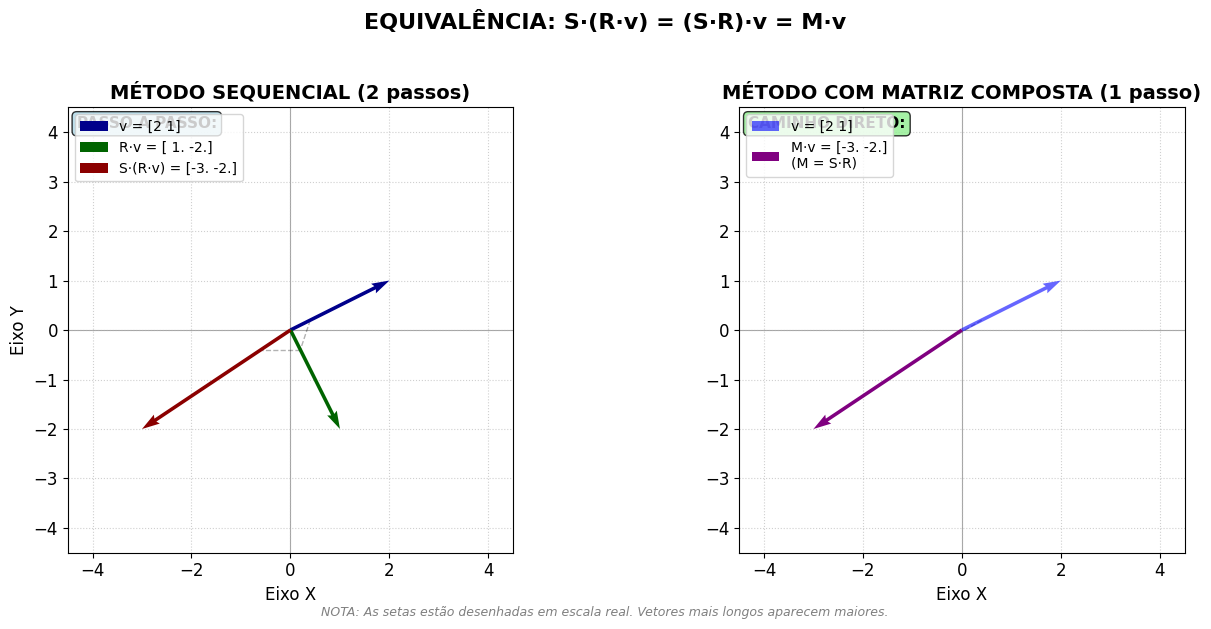


Observação importante:
A matriz composta M = S·R captura AMBAS as transformações em uma só matriz.
Em vez de aplicar duas transformações, aplicamos UMA transformação composta.

Vantagens:
1. Mais eficiente computacionalmente
2. Menos operações de ponto flutuante
3. Pode ser pré-calculada e reutilizada


In [12]:
print("ITEM 3: Procedimento Slides 70-92 (Matriz Composta)")

# PASSO 1: Calcular a matriz composta M = S·R
print("\n3.1 Calculando a matriz composta M = S·R")
print("-" * 50)

print("\nTemos duas matrizes:")
print(f"R (rotação) = \n{matriz_rotacao}")
print(f"\nS (cisalhamento) = \n{matriz_cisalhamento}")

print("\nPara calcular M = S·R, multiplicamos S por R:")
print("Lembrando: na multiplicação matricial, a ordem importa!")
print("S·R significa: aplicar R primeiro, depois S")

M_composta = matriz_cisalhamento @ matriz_rotacao
print(f"\nM = S @ R = \n{M_composta}")

print("\nCálculo passo a passo:")
print("M[0,0] = S[0,0]*R[0,0] + S[0,1]*R[1,0] = 1*0 + 2*(-1) = -2")
print("M[0,1] = S[0,0]*R[0,1] + S[0,1]*R[1,1] = 1*1 + 2*0 = 1")
print("M[1,0] = S[1,0]*R[0,0] + S[1,1]*R[1,0] = 0*0 + 1*(-1) = -1")
print("M[1,1] = S[1,0]*R[0,1] + S[1,1]*R[1,1] = 0*1 + 1*0 = 0")

# PASSO 2: Verificar que S·(R·v) = (S·R)·v = M·v
print("\n\n3.2 Verificando a equivalência:")
print("-" * 50)

print("\nMétodo 1: Transformação sequencial (já calculado no Item 1)")
print(f"Passo 1: R·v = {matriz_rotacao} @ {v_original} = {v_rotacionado}")
print(f"Passo 2: S·(R·v) = {matriz_cisalhamento} @ {v_rotacionado} = {v_final}")
print(f"Resultado sequencial: {v_final}")

print("\nMétodo 2: Usando matriz composta")
print(f"M·v = {M_composta} @ {v_original}")
v_direto = M_composta @ v_original
print(f"Resultado com matriz composta: {v_direto}")

# Comparar resultados
print("\nComparação:")
print(f"S·(R·v) = {v_final}")
print(f"(S·R)·v = M·v = {v_direto}")

if np.allclose(v_final, v_direto):
    print("\n✓✓✓ RESULTADOS IDÊNTICOS! ✓✓✓")
    print("Isso prova que: S·(R·v) = (S·R)·v")
    print("Esta é uma propriedade fundamental da álgebra linear!")
else:
    print("\n✗✗✗ Resultados diferentes - algo está errado!")

# PASSO 3: Visualizar a equivalência
print("\n\n3.3 Visualização da equivalência:")
print("-" * 50)

def visualizar_equivalencia(v, v_seq, v_dir, v_rot):
    """
    Mostra visualmente que os dois métodos dão o mesmo resultado
    COM AJUSTE DE TAMANHO DAS SETAS
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # GRÁFICO 1: MÉTODO SEQUENCIAL
    ax1.set_title('MÉTODO SEQUENCIAL (2 passos)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Eixo X')
    ax1.set_ylabel('Eixo Y')

    # Configurar grade e eixos
    ax1.axhline(y=0, color='gray', linewidth=0.8, alpha=0.7, zorder=1)
    ax1.axvline(x=0, color='gray', linewidth=0.8, alpha=0.7, zorder=1)
    ax1.grid(True, linestyle=':', alpha=0.6, zorder=1)
    ax1.set_aspect('equal')

    # Determinar limites dos eixos baseado no maior vetor
    todos_vetores = [v, v_rot, v_seq]
    max_val = max(np.max(np.abs(vetor)) for vetor in todos_vetores) * 1.5
    ax1.set_xlim(-max_val, max_val)
    ax1.set_ylim(-max_val, max_val)

    # Adicionar texto explicativo no gráfico
    ax1.text(0.02, 0.98, 'PASSO A PASSO:',
             transform=ax1.transAxes,
             fontsize=11, fontweight='bold',
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

    # DESENHAR AS SETAS

    # 1. Vetor original (AZUL)
    # Vamos usar scale_units='xy' mas ajustar manualmente o scale
    ax1.quiver(0, 0, v[0], v[1],
               angles='xy', scale_units='xy', scale=1,
               color='darkblue', width=0.008,
               label=f'v = {v}', zorder=3)

    # 2. Após rotação (VERDE)
    ax1.quiver(0, 0, v_rot[0], v_rot[1],
               angles='xy', scale_units='xy', scale=1,
               color='darkgreen', width=0.008,
               label=f'R·v = {v_rot}', zorder=3)

    # 3. Resultado final (VERMELHO)
    ax1.quiver(0, 0, v_seq[0], v_seq[1],
               angles='xy', scale_units='xy', scale=1,
               color='darkred', width=0.008,
               label=f'S·(R·v) = {v_seq}', zorder=3)

    # Adicionar legendas
    ax1.legend(loc='upper left', fontsize=10)

    # Adicionar setas tracejadas para mostrar o caminho
    # Linha do original para rotacionado
    ax1.plot([v[0]*0.2, v_rot[0]*0.2], [v[1]*0.2, v_rot[1]*0.2],
             'k--', alpha=0.3, linewidth=1)

    # Linha do rotacionado para final
    ax1.plot([v_rot[0]*0.2, v_seq[0]*0.2], [v_rot[1]*0.2, v_seq[1]*0.2],
             'k--', alpha=0.3, linewidth=1)

    # GRÁFICO 2: MÉTODO COM MATRIZ COMPOSTA
    ax2.set_title('MÉTODO COM MATRIZ COMPOSTA (1 passo)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Eixo X')

    # Configurar grade e eixos
    ax2.axhline(y=0, color='gray', linewidth=0.8, alpha=0.7, zorder=1)
    ax2.axvline(x=0, color='gray', linewidth=0.8, alpha=0.7, zorder=1)
    ax2.grid(True, linestyle=':', alpha=0.6, zorder=1)
    ax2.set_aspect('equal')

    # Usar os mesmos limites
    ax2.set_xlim(-max_val, max_val)
    ax2.set_ylim(-max_val, max_val)

    # Adicionar texto explicativo
    ax2.text(0.02, 0.98, 'CAMINHO DIRETO:',
             transform=ax2.transAxes,
             fontsize=11, fontweight='bold',
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

    # DESENHAR AS SETAS
    # 1. Vetor original (AZUL - mais claro para diferenciar)
    ax2.quiver(0, 0, v[0], v[1],
               angles='xy', scale_units='xy', scale=1,
               color='blue', width=0.008, alpha=0.6,
               label=f'v = {v}', zorder=3)

    # 2. Resultado com matriz composta (ROXO)
    ax2.quiver(0, 0, v_dir[0], v_dir[1],
               angles='xy', scale_units='xy', scale=1,
               color='purple', width=0.008,
               label=f'M·v = {v_dir}\n(M = S·R)', zorder=3)

    # Adicionar legendas
    ax2.legend(loc='upper left', fontsize=10)

    # Linha do original para final
    ax2.plot([v[0]*0.2, v_dir[0]*0.2], [v[1]*0.2, v_dir[1]*0.2],
             'k--', alpha=0.3, linewidth=1)

    # ADICIONAR ANOTAÇÕES E TÍTULO GERAL
    plt.suptitle('EQUIVALÊNCIA: S·(R·v) = (S·R)·v = M·v',
                 fontsize=16, fontweight='bold', y=1.02)

    # Adicionar nota sobre o ajuste
    fig.text(0.5, 0.01,
             'NOTA: As setas estão desenhadas em escala real. Vetores mais longos aparecem maiores.',
             ha='center', fontsize=9, style='italic', color='gray')

    plt.tight_layout()
    plt.show()

# Chamar a função corrigida
visualizar_equivalencia(v_original, v_final, v_direto, v_rotacionado)
print("\nObservação importante:")
print("A matriz composta M = S·R captura AMBAS as transformações em uma só matriz.")
print("Em vez de aplicar duas transformações, aplicamos UMA transformação composta.")
print("\nVantagens:")
print("1. Mais eficiente computacionalmente")
print("2. Menos operações de ponto flutuante")
print("3. Pode ser pré-calculada e reutilizada")

#Invertendo a Ordem das Transformações
Pode-se observar abaixo o que acontece quando invertemos a ordem das transformações.

ITEM 4: Invertendo a Ordem das Transformações

4.1 Calculando matriz composta na ordem inversa: R·S
--------------------------------------------------

Ordem original: M = S·R (aplicar R, depois S)
M = 
[[-2.000000e+00  1.000000e+00]
 [-1.000000e+00  6.123234e-17]]

Ordem inversa: M' = R·S (aplicar S, depois R)
M' = R @ S = 
[[ 6.123234e-17  1.000000e+00]
 [-1.000000e+00 -2.000000e+00]]

Cálculo passo a passo de M':
M'[0,0] = R[0,0]*S[0,0] + R[0,1]*S[1,0] = 0*1 + 1*0 = 0
M'[0,1] = R[0,0]*S[0,1] + R[0,1]*S[1,1] = 0*2 + 1*1 = 1
M'[1,0] = R[1,0]*S[0,0] + R[1,1]*S[1,0] = (-1)*1 + 0*0 = -1
M'[1,1] = R[1,0]*S[0,1] + R[1,1]*S[1,1] = (-1)*2 + 0*1 = -2


4.2 Comparação das matrizes compostas:
--------------------------------------------------
Matriz composta ORIGINAL (S·R):
M = S·R = 
[[-2.000000e+00  1.000000e+00]
 [-1.000000e+00  6.123234e-17]]

Matriz composta INVERSA (R·S):
M' = R·S = 
[[ 6.123234e-17  1.000000e+00]
 [-1.000000e+00 -2.000000e+00]]

São as mesmas matrizes?
✗ NÃO! As matrizes

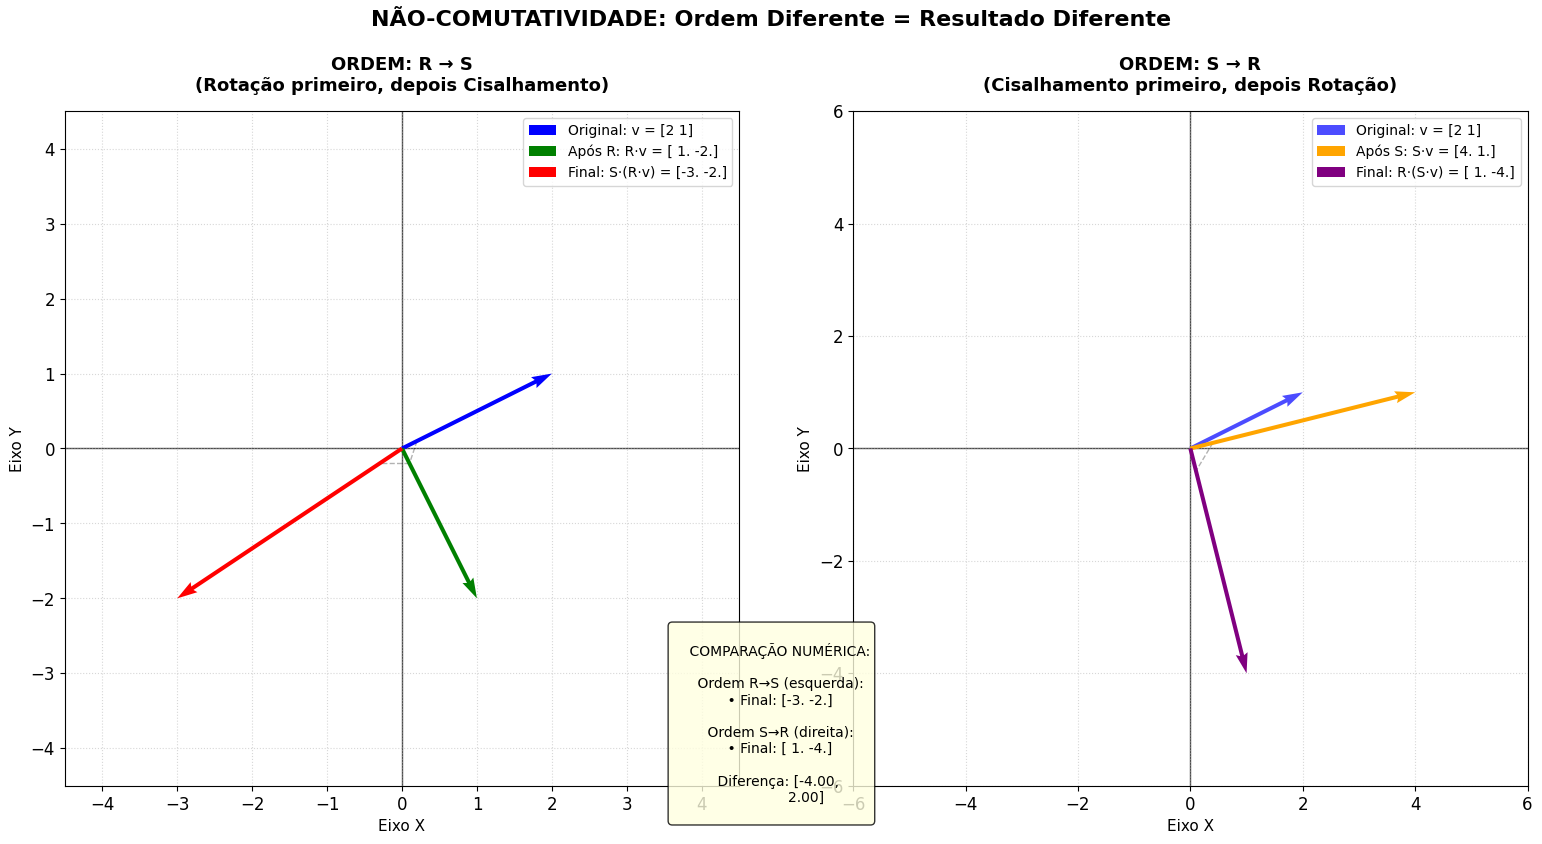


Conclusão importante:
Transformações lineares, em geral, NÃO COMUTAM.
A·B ≠ B·A para a maioria das matrizes A e B.

Implicação prática:
Em computação gráfica, a ordem das transformações é CRUCIAL.
Exemplo: Escalar → Rotacionar ≠ Rotacionar → Escalar


In [18]:
print("ITEM 4: Invertendo a Ordem das Transformações")

# PASSO 1: Calcular matriz composta na ordem inversa: R·S
print("\n4.1 Calculando matriz composta na ordem inversa: R·S")
print("-" * 50)

print("\nOrdem original: M = S·R (aplicar R, depois S)")
print(f"M = \n{M_composta}")

print("\nOrdem inversa: M' = R·S (aplicar S, depois R)")
M_inversa = matriz_rotacao @ matriz_cisalhamento
print(f"M' = R @ S = \n{M_inversa}")

print("\nCálculo passo a passo de M':")
print("M'[0,0] = R[0,0]*S[0,0] + R[0,1]*S[1,0] = 0*1 + 1*0 = 0")
print("M'[0,1] = R[0,0]*S[0,1] + R[0,1]*S[1,1] = 0*2 + 1*1 = 1")
print("M'[1,0] = R[1,0]*S[0,0] + R[1,1]*S[1,0] = (-1)*1 + 0*0 = -1")
print("M'[1,1] = R[1,0]*S[0,1] + R[1,1]*S[1,1] = (-1)*2 + 0*1 = -2")

# PASSO 2: Comparar as matrizes compostas
print("\n\n4.2 Comparação das matrizes compostas:")
print("-" * 50)

print("Matriz composta ORIGINAL (S·R):")
print(f"M = S·R = \n{M_composta}")

print("\nMatriz composta INVERSA (R·S):")
print(f"M' = R·S = \n{M_inversa}")

print("\nSão as mesmas matrizes?")
if np.allclose(M_composta, M_inversa):
    print("✓ SIM! As matrizes são iguais.")
    print("  Neste caso especial, S·R = R·S")
else:
    print("✗ NÃO! As matrizes são DIFERENTES.")
    print("  Em geral, para matrizes A e B: A·B ≠ B·A")

# PASSO 3: Aplicar ao vetor v na ordem inversa
print("\n\n4.3 Aplicando ao vetor v na ordem inversa:")
print("-" * 50)

print(f"\nVetor original: v = {v_original}")

print("\nOrdem original (S·R):")
print(f"M·v = {M_composta} @ {v_original} = {M_composta @ v_original}")

print("\nOrdem inversa (R·S):")
v_inverso = M_inversa @ v_original
print(f"M'·v = {M_inversa} @ {v_original} = {v_inverso}")

print("\nComparando resultados finais:")
print(f"Ordem S·R: {M_composta @ v_original}")
print(f"Ordem R·S: {v_inverso}")

if np.allclose(M_composta @ v_original, v_inverso):
    print("\n✓ Resultados finais iguais!")
else:
    print("\n✗ Resultados finais DIFERENTES!")
    print("Isso mostra que a ORDEM DAS TRANSFORMAÇÕES IMPORTA!")

# PASSO 4: Visualizar a diferença
print("\n\n4.4 Visualizando a diferença:")
print("-" * 50)

def visualizar_nao_comutatividade(v, v_final_R_S, v_final_S_R, v_cisalhado, v_rotacionado):
    fig = plt.figure(figsize=(16, 8))

    # SUBPLOT 1: ORDEM ORIGINAL R→S (ESQUERDA)
    ax1 = plt.subplot(1, 2, 1)

    # Configurar eixos
    ax1.axhline(y=0, color='black', linewidth=1, alpha=0.7, zorder=1)
    ax1.axvline(x=0, color='black', linewidth=1, alpha=0.7, zorder=1)
    ax1.grid(True, linestyle=':', alpha=0.5, zorder=1)
    ax1.set_aspect('equal')
    ax1.set_xlabel('Eixo X', fontsize=11)
    ax1.set_ylabel('Eixo Y', fontsize=11)

    # Determinar limites automáticos
    todos_vetores_1 = [v, v_rotacionado, v_final_R_S]
    max_val_1 = max(np.max(np.abs(vetor)) for vetor in todos_vetores_1) * 1.5
    ax1.set_xlim(-max_val_1, max_val_1)
    ax1.set_ylim(-max_val_1, max_val_1)

    # Vetor original
    ax1.quiver(0, 0, v[0], v[1],
               angles='xy', scale_units='xy', scale=1,
               color='blue', width=0.006,
               label=f'Original: v = {v}', zorder=3)

    # Após rotação
    ax1.quiver(0, 0, v_rotacionado[0], v_rotacionado[1],
               angles='xy', scale_units='xy', scale=1,
               color='green', width=0.006,
               label=f'Após R: R·v = {v_rotacionado}', zorder=3)

    # Resultado final
    ax1.quiver(0, 0, v_final_R_S[0], v_final_R_S[1],
               angles='xy', scale_units='xy', scale=1,
               color='red', width=0.006,
               label=f'Final: S·(R·v) = {v_final_R_S}', zorder=3)

    # Legendas
    ax1.legend(loc='best', fontsize=10)

    # Título e anotações
    ax1.set_title('ORDEM: R → S\n(Rotação primeiro, depois Cisalhamento)',
                  fontsize=13, fontweight='bold', pad=15)

    # Adicionar caminho
    ax1.plot([v[0]*0.1, v_rotacionado[0]*0.1],
             [v[1]*0.1, v_rotacionado[1]*0.1],
             'k--', alpha=0.3, linewidth=1)
    ax1.plot([v_rotacionado[0]*0.1, v_final_R_S[0]*0.1],
             [v_rotacionado[1]*0.1, v_final_R_S[1]*0.1],
             'k--', alpha=0.3, linewidth=1)

    # SUBPLOT 2: ORDEM INVERSA S→R (DIREITA)
    ax2 = plt.subplot(1, 2, 2)

    # Configurar eixos
    ax2.axhline(y=0, color='black', linewidth=1, alpha=0.7, zorder=1)
    ax2.axvline(x=0, color='black', linewidth=1, alpha=0.7, zorder=1)
    ax2.grid(True, linestyle=':', alpha=0.5, zorder=1)
    ax2.set_aspect('equal')
    ax2.set_xlabel('Eixo X', fontsize=11)
    ax2.set_ylabel('Eixo Y', fontsize=11)

    # Determinar limites automáticos
    todos_vetores_2 = [v, v_cisalhado, v_final_S_R]
    max_val_2 = max(np.max(np.abs(vetor)) for vetor in todos_vetores_2) * 1.5
    ax2.set_xlim(-max_val_2, max_val_2)
    ax2.set_ylim(-max_val_2, max_val_2)

    # Vetor original (mesma cor mas mais claro)
    ax2.quiver(0, 0, v[0], v[1],
               angles='xy', scale_units='xy', scale=1,
               color='blue', width=0.006, alpha=0.7,
               label=f'Original: v = {v}', zorder=3)

    # Após cisalhamento
    ax2.quiver(0, 0, v_cisalhado[0], v_cisalhado[1],
               angles='xy', scale_units='xy', scale=1,
               color='orange', width=0.006,
               label=f'Após S: S·v = {v_cisalhado}', zorder=3)

    # Resultado final
    ax2.quiver(0, 0, v_final_S_R[0], v_final_S_R[1],
               angles='xy', scale_units='xy', scale=1,
               color='purple', width=0.006,
               label=f'Final: R·(S·v) = {v_final_S_R}', zorder=3)

    # Legendas
    ax2.legend(loc='best', fontsize=10)

    # Título e anotações
    ax2.set_title('ORDEM: S → R\n(Cisalhamento primeiro, depois Rotação)',
                  fontsize=13, fontweight='bold', pad=15)

    # Adicionar caminho
    ax2.plot([v[0]*0.1, v_cisalhado[0]*0.1],
             [v[1]*0.1, v_cisalhado[1]*0.1],
             'k--', alpha=0.3, linewidth=1)
    ax2.plot([v_cisalhado[0]*0.1, v_final_S_R[0]*0.1],
             [v_cisalhado[1]*0.1, v_final_S_R[1]*0.1],
             'k--', alpha=0.3, linewidth=1)

    # TÍTULO GERAL E INFORMAÇÕES
    plt.suptitle('NÃO-COMUTATIVIDADE: Ordem Diferente = Resultado Diferente',
                 fontsize=16, fontweight='bold', y=1.02)

    # Adicionar tabela de comparação
    texto_comparacao = f"""
    COMPARAÇÃO NUMÉRICA:

    Ordem R→S (esquerda):
    • Final: {v_final_R_S}

    Ordem S→R (direita):
    • Final: {v_final_S_R}

    Diferença: [{v_final_R_S[0] - v_final_S_R[0]:.2f},
                {v_final_R_S[1] - v_final_S_R[1]:.2f}]
    """

    fig.text(0.5, 0.01, texto_comparacao,
             ha='center', fontsize=10,
             bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

    plt.tight_layout()
    plt.show()

visualizar_nao_comutatividade(v_original, v_final, v_final_inverso, v_cisalhado, v_rotacionado)

print("\nConclusão importante:")
print("Transformações lineares, em geral, NÃO COMUTAM.")
print("A·B ≠ B·A para a maioria das matrizes A e B.")
print("\nImplicação prática:")
print("Em computação gráfica, a ordem das transformações é CRUCIAL.")
print("Exemplo: Escalar → Rotacionar ≠ Rotacionar → Escalar")

#Vetores a 90° e Produto Escalar

Vamos usar uma transformação linear para criar vetores perpendiculares e entender o produto escalar.

ITEM 5: Vetores a 90° e Produto Escalar

5.1 Exemplo do enunciado:
--------------------------------------------------
Código fornecido pelo professor:
```python
import numpy as np
v1 = np.array([1, 2])
v2 = np.array([4, 5])
dot = np.dot(v1, v2)
```

Executando o código:
v1 = [1 2]
v2 = [4 5]
dot = np.dot(v1, v2) = 14

Interpretação:
O produto escalar é 14.
Como NÃO É ZERO (14), os vetores NÃO são perpendiculares.
É POSITIVO, então o ângulo entre eles é AGUDO (< 90°).


5.2 Criando vetores perpendiculares:
--------------------------------------------------
Vamos usar a matriz de rotação R (90° horário) para criar
um vetor perpendicular a qualquer vetor dado.

Escolhendo um vetor x qualquer: x = [3 1]

Aplicando rotação de 90°: y = R·x
y = [[ 6.123234e-17  1.000000e+00]
 [-1.000000e+00  6.123234e-17]] @ [3 1] = [ 1. -3.]

Vamos verificar se são realmente perpendiculares...


5.3 Calculando o produto escalar:
--------------------------------------------------
Produto escalar: x·y = x₁·y₁ 

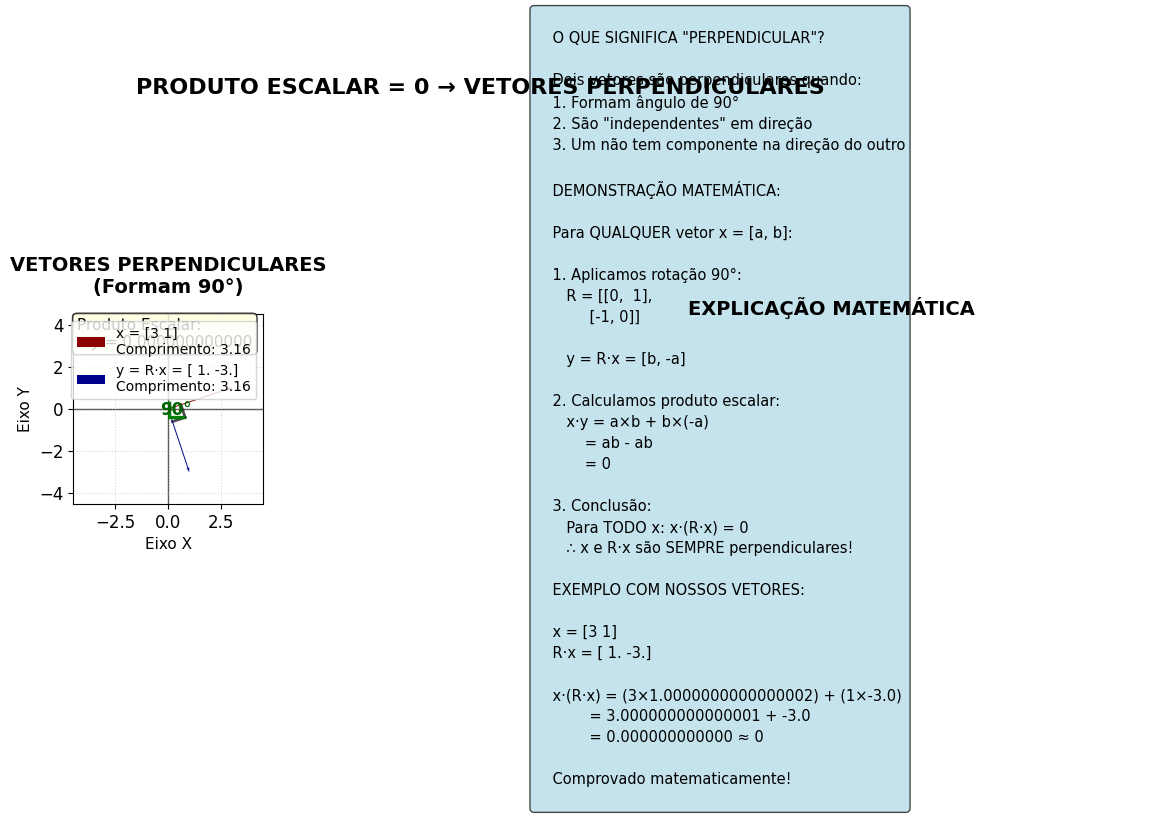



5.5 Testando com outros vetores:
--------------------------------------------------
Vamos testar se a propriedade funciona para vários vetores:

Vetor x         y = R·x         x·y        Perpendicular?
------------------------------------------------------------
[1 0]           [ 6.123234e-17 -1.000000e+00] 0.0        ✓ SIM
[0 1]           [1.000000e+00 6.123234e-17] 0.0        ✓ SIM
[2 3]           [ 3. -2.]       0.0        ✓ SIM
[-1  2]         [2. 1.]         0.0        ✓ SIM
[-2 -1]         [-1.  2.]       0.0        ✓ SIM
[ 3 -2]         [-2. -3.]       0.0        ✓ SIM

Conclusão:
Para TODOS os vetores testados, x·(R·x) = 0.
A rotação de 90° SEMPRE produz vetores perpendiculares!


5.6 Explicação matemática detalhada:
--------------------------------------------------

PROVA MATEMÁTICA:

Para qualquer vetor x = [a, b]:

1. Aplicamos rotação de 90°:
   R = [[0, 1],
        [-1, 0]]
   
   y = R·x = [0*a + 1*b, (-1)*a + 0*b] = [b, -a]

2. Calculamos produto escalar:
   x·y = a×

In [21]:
print("ITEM 5: Vetores a 90° e Produto Escalar")

# PASSO 1: Exemplo do enunciado
print("\n5.1 Exemplo do enunciado:")
print("-" * 50)

print("Código fornecido pelo professor:")
print("```python")
print("import numpy as np")
print("v1 = np.array([1, 2])")
print("v2 = np.array([4, 5])")
print("dot = np.dot(v1, v2)")
print("```")

# Executar o código
v1 = np.array([1, 2])
v2 = np.array([4, 5])
dot_exemplo = np.dot(v1, v2)

print(f"\nExecutando o código:")
print(f"v1 = {v1}")
print(f"v2 = {v2}")
print(f"dot = np.dot(v1, v2) = {dot_exemplo}")

print("\nInterpretação:")
print(f"O produto escalar é {dot_exemplo}.")
if np.isclose(dot_exemplo, 0):
    print("Como é ZERO, os vetores são PERPENDICULARES (formam 90°).")
else:
    print(f"Como NÃO É ZERO ({dot_exemplo}), os vetores NÃO são perpendiculares.")

if dot_exemplo > 0:
    print("É POSITIVO, então o ângulo entre eles é AGUDO (< 90°).")
elif dot_exemplo < 0:
    print("É NEGATIVO, então o ângulo entre eles é OBTUSO (> 90°).")

# PASSO 2: Criando vetores perpendiculares usando rotação de 90°
print("\n\n5.2 Criando vetores perpendiculares:")
print("-" * 50)

print("Vamos usar a matriz de rotação R (90° horário) para criar")
print("um vetor perpendicular a qualquer vetor dado.")

# Escolher um vetor qualquer
x = np.array([3, 1])
print(f"\nEscolhendo um vetor x qualquer: x = {x}")

# Aplicar rotação de 90° para obter vetor perpendicular
print(f"\nAplicando rotação de 90°: y = R·x")
y = matriz_rotacao @ x
print(f"y = {matriz_rotacao} @ {x} = {y}")

# Mostrar graficamente
print("\nVamos verificar se são realmente perpendiculares...")

# PASSO 3: Calcular produto escalar
print("\n\n5.3 Calculando o produto escalar:")
print("-" * 50)

print("Produto escalar: x·y = x₁·y₁ + x₂·y₂")
print(f"x·y = {x[0]}×{y[0]} + {x[1]}×{y[1]}")
produto = np.dot(x, y)
print(f"x·y = {produto}")

print("\nInterpretação:")
if np.isclose(produto, 0):
    print("✓ O produto escalar é ZERO!")
    print("✓ Portanto, x e y são PERPENDICULARES.")
    print("✓ Eles formam um ângulo de 90°.")
else:
    print("✗ O produto escalar NÃO é zero.")
    print(f"✗ Valor: {produto}")

# PASSO 4: Visualizar os vetores perpendiculares
print("\n\n5.4 Visualização dos vetores perpendiculares:")
print("-" * 50)

def visualizar_perpendiculares(x, y, produto):
    """
    Mostra visualmente vetores perpendiculares com ajustes de tamanho
    """
    fig = plt.figure(figsize=(14, 6))

    # SUBPLOT 1: VISUALIZAÇÃO GRÁFICA
    ax1 = plt.subplot(1, 2, 1)

    # Configurar eixos
    ax1.axhline(y=0, color='black', linewidth=1, alpha=0.7, zorder=1)
    ax1.axvline(x=0, color='black', linewidth=1, alpha=0.7, zorder=1)
    ax1.grid(True, linestyle=':', alpha=0.5, zorder=1)
    ax1.set_aspect('equal')
    ax1.set_xlabel('Eixo X', fontsize=11)
    ax1.set_ylabel('Eixo Y', fontsize=11)

    # Determinar limites automáticos
    todos_vetores = [x, y]
    max_val = max(np.max(np.abs(vetor)) for vetor in todos_vetores) * 1.5
    ax1.set_xlim(-max_val, max_val)
    ax1.set_ylim(-max_val, max_val)

    # Calcular comprimentos para referência
    comprimento_x = np.linalg.norm(x)
    comprimento_y = np.linalg.norm(y)

    # Vetor x (VERMELHO)
    ax1.quiver(0, 0, x[0], x[1],
               angles='xy', scale_units='xy', scale=1,
               color='darkred', width=0.005,
               label=f'x = {x}\nComprimento: {comprimento_x:.2f}',
               zorder=3)

    # Vetor y (AZUL)
    ax1.quiver(0, 0, y[0], y[1],
               angles='xy', scale_units='xy', scale=1,
               color='darkblue', width=0.005,
               label=f'y = R·x = {y}\nComprimento: {comprimento_y:.2f}',
               zorder=3)

    # Adicionar ângulo reto (quadradinho)
    # Escalar os vetores para o quadradinho
    escala_quad = 0.2  # 20% do tamanho dos vetores
    x_quad = x * escala_quad
    y_quad = y * escala_quad

    # Desenhar linhas para formar o quadradinho do ângulo reto
    ax1.plot([x_quad[0], x_quad[0] + y_quad[0]],
             [x_quad[1], x_quad[1] + y_quad[1]],
             'k-', linewidth=2, alpha=0.7, zorder=2)

    ax1.plot([y_quad[0], y_quad[0] + x_quad[0]],
             [y_quad[1], y_quad[1] + x_quad[1]],
             'k-', linewidth=2, alpha=0.7, zorder=2)

    # Adicionar símbolo de ângulo reto
    ax1.text(x_quad[0]/2 + y_quad[0]/2,
             x_quad[1]/2 + y_quad[1]/2,
             '∟', fontsize=20, fontweight='bold',
             ha='center', va='center', color='green')

    # Adicionar texto "90°"
    ax1.text(x_quad[0]/2 + y_quad[0]/4,
             x_quad[1]/2 + y_quad[1]/4,
             '90°', fontsize=12, fontweight='bold',
             ha='center', va='center', color='darkgreen')

    # Legendas
    ax1.legend(loc='best', fontsize=10)

    # Título
    ax1.set_title('VETORES PERPENDICULARES\n(Formam 90°)',
                  fontsize=14, fontweight='bold', pad=15)

    # Adicionar produto escalar como anotação
    ax1.text(0.02, 0.98, f'Produto Escalar:\nx·y = {produto:.12f}',
             transform=ax1.transAxes,
             fontsize=11,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

    # SUBPLOT 2: EXPLICAÇÃO MATEMÁTICA
    ax2 = plt.subplot(1, 2, 2)
    ax2.axis('off')  # Desligar eixos para texto

    # Texto explicativo formatado
    texto_explicativo = f"""
    O QUE SIGNIFICA "PERPENDICULAR"?

    Dois vetores são perpendiculares quando:
    1. Formam ângulo de 90°
    2. São "independentes" em direção
    3. Um não tem componente na direção do outro

    DEMONSTRAÇÃO MATEMÁTICA:

    Para QUALQUER vetor x = [a, b]:

    1. Aplicamos rotação 90°:
       R = [[0,  1],
            [-1, 0]]

       y = R·x = [b, -a]

    2. Calculamos produto escalar:
       x·y = a×b + b×(-a)
           = ab - ab
           = 0

    3. Conclusão:
       Para TODO x: x·(R·x) = 0
       ∴ x e R·x são SEMPRE perpendiculares!

    EXEMPLO COM NOSSOS VETORES:

    x = {x}
    R·x = {y}

    x·(R·x) = ({x[0]}×{y[0]}) + ({x[1]}×{y[1]})
            = {x[0]*y[0]} + {x[1]*y[1]}
            = {produto:.12f} ≈ 0

    Comprovado matematicamente!
    """

    ax2.text(0.05, 0.5, texto_explicativo,
             transform=ax2.transAxes,
             fontsize=10.5,
             verticalalignment='center',
             linespacing=1.5,
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

    ax2.set_title('EXPLICAÇÃO MATEMÁTICA',
                  fontsize=14, fontweight='bold', y=0.95)
    # TÍTULO GERAL
    plt.suptitle('PRODUTO ESCALAR = 0 → VETORES PERPENDICULARES',
                 fontsize=16, fontweight='bold', y=1.02)

    plt.tight_layout()
    plt.show()

# Chamar a função corrigida
visualizar_perpendiculares(x, y, produto)

# PASSO 5: Testar com outros vetores
print("\n\n5.5 Testando com outros vetores:")
print("-" * 50)

print("Vamos testar se a propriedade funciona para vários vetores:")

vetores_teste = [
    np.array([1, 0]),    # Vetor horizontal
    np.array([0, 1]),    # Vetor vertical
    np.array([2, 3]),    # Vetor no primeiro quadrante
    np.array([-1, 2]),   # Vetor no segundo quadrante
    np.array([-2, -1]),  # Vetor no terceiro quadrante
    np.array([3, -2])    # Vetor no quarto quadrante
]

print(f"\n{'Vetor x':<15} {'y = R·x':<15} {'x·y':<10} {'Perpendicular?'}")
print("-" * 60)

for x_teste in vetores_teste:
    y_teste = matriz_rotacao @ x_teste
    produto_teste = np.dot(x_teste, y_teste)
    perpendicular = "✓ SIM" if np.isclose(produto_teste, 0) else "✗ NÃO"

    print(f"{str(x_teste):<15} {str(y_teste):<15} {produto_teste:<10.1f} {perpendicular}")

print("\nConclusão:")
print("Para TODOS os vetores testados, x·(R·x) = 0.")
print("A rotação de 90° SEMPRE produz vetores perpendiculares!")

# PASSO 6: Explicação matemática detalhada
print("\n\n5.6 Explicação matemática detalhada:")
print("-" * 50)

print("""
PROVA MATEMÁTICA:

Para qualquer vetor x = [a, b]:

1. Aplicamos rotação de 90°:
   R = [[0, 1],
        [-1, 0]]

   y = R·x = [0*a + 1*b, (-1)*a + 0*b] = [b, -a]

2. Calculamos produto escalar:
   x·y = a×b + b×(-a) = ab - ab = 0

3. Portanto, para QUALQUER [a, b]:
   x·(R·x) = 0

INTERPRETAÇÃO FÍSICA:

O produto escalar mede "quanto um vetor vai na direção do outro".
Quando é zero, significa que os vetores são completamente independentes
em direção - um não tem componente na direção do outro.
""")